In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Implement Logistic Regression

This will be helpful to further familiarize yourself with Numpy and how Logistic Regression actually works.
If you face any problems, feel free to contact us in Slack

### Load the breast cancer dataset (from sklearn)

In [3]:
# Code here
x, y = load_breast_cancer(return_X_y= True, as_frame=True)
display(x)
print(x.columns.values)
print(y.shape)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569,)


### Train test split

In [4]:
# Code here
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(512, 30) (57, 30) (512,) (57,)


### Apply feature scaling on the data

In [5]:
# Code here

X_test = ((X_test - X_test.mean()) / (X_test.max() - X_test.mean()))
temp = np.ones((X_test.shape[0], X_test.shape[1]+1))
temp[:, 1:] = X_test
X_test = temp

X_train = ((X_train - X_train.mean()) / (X_train.max() - X_train.mean()))
temp = np.ones((X_train.shape[0], X_train.shape[1]+1))
temp[:, 1:] = X_train
X_train = temp

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [6]:
W = np.random.uniform(-1, 1, X_train.shape[1])  # Weights
alpha = 0.01 # Learning Rate

print(W.shape)

(31,)


### Define sigmoid and its derivative
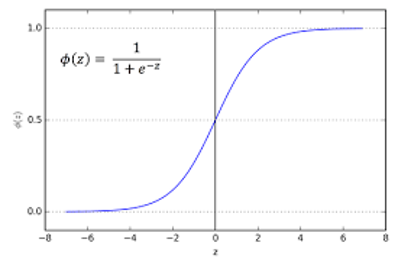

In [7]:
def sigmoid(X: np.array):
    # Apply sigmoid to X and return 
    return 1 / (1 + np.exp(-X))

def sigmoid_(X: np.array):
    # return derivative of sigmoid
    return sigmoid(X)*(1 - sigmoid(X))

### Prediction methods

In [8]:
def predict_prob(X, W):
    # Return the class probabilities here
    return sigmoid(np.matmul(X, W))

def predict(X, W):
    prob = predict_prob(X, W)
    res = np.zeros(prob.shape)
    for i in range(prob.shape[0]):
        if prob[i] > 0.5:
            res[i] =  1
    return res

### Define the Cross entropy loss function

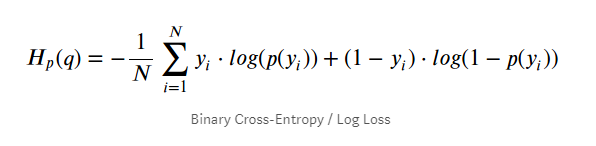

In [9]:
# Code here
def binary_cross_entropy(y, yhat):
    return - (np.dot(y, np.log(yhat))+ np.dot((1 - y), np.log(1 - yhat))) / y.shape[0]

In [10]:
print(X_train.shape, W.shape)
yhat = predict_prob(X_train, W)
print(yhat.shape)

(512, 31) (31,)
(512,)


In [11]:
loss = binary_cross_entropy(y_train, yhat)
print(y_train.shape, yhat.shape)
print(loss)

(512,) (512,)
0.5019853978195058


# Solve using Gradient Descent

### Calculate gradient
For practice, you can try to derive the gradient using pen and paper

In [12]:
def compute_gradient(X, y, W):
    # Code here
    # dL/dy * dy/dW
    return np.dot(X.T, predict_prob(X, W)-y) / (2 *X.shape[0])

### Update Weights

In [13]:
# Code here
W = W - alpha*compute_gradient(X_train, y_train, W)
print(W)

[ 0.63147786 -0.22663688 -0.97237559 -0.53378703 -0.69383951 -0.51866157
 -0.16414272 -0.03234328 -0.7451452   0.07402164 -0.33339608  0.66576318
 -0.81032733  0.24048693 -0.30411824 -0.4311893   0.37311989  0.35460617
  0.31782455 -0.73913258  0.47058439  0.1415823   0.53625846  0.45674229
 -0.35575434  0.10567714 -0.25459465  0.26770548 -0.46293882 -0.57585107
  0.99610829]


### Repeat for N- Iterations

In [14]:
N = 1000
losses = []
for i in range(N):
    # Predict
    yhat = predict_prob(X_train, W)
    
    # Calculate Loss
    loss = binary_cross_entropy(y_train, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(X_train, y_train, W)
    
    # Update the weights
    W = W - alpha*dW
    
    losses.append(loss)

print(len(losses))
print(losses)

1000
[0.50171486006152, 0.5014446882304557, 0.5011748816769158, 0.5009054397526359, 0.5006363618104834, 0.5003676472044578, 0.5000992952896895, 0.4998313054224399, 0.49956367696010073, 0.4992964092611937, 0.49902950168536975, 0.4987629535934087, 0.49849676434721896, 0.4982309333098366, 0.4979654598454249, 0.4977003433192742, 0.49743558309780056, 0.4971711785485462, 0.4969071290401776, 0.4966434339424863, 0.49638009262638694, 0.49611710446391777, 0.4958544688282393, 0.4955921850936339, 0.49533025263550473, 0.49506867083037587, 0.49480743905589086, 0.4945465566908123, 0.49428602311502107, 0.4940258377095157, 0.4937659998564112, 0.49350650893893916, 0.49324736434144606, 0.4929885654493929, 0.49273011164935465, 0.49247200232901894, 0.49221423687718546, 0.4919568146837653, 0.4916997351397799, 0.4914429976373603, 0.49118660156974625, 0.4909305463312853, 0.49067483131743195, 0.49041945592474684, 0.4901644195508956, 0.48990972159464846, 0.4896553614558786, 0.48940133853556184, 0.48914765223577

### Plot the loss curve

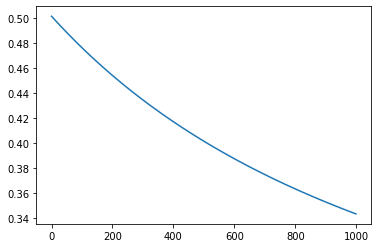

In [15]:
# Loss curve here
plt.plot(losses)
plt.show()

### Calculate the classification report and the confusion matrix

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Scores here
y_predict = predict(X_test, W)
print(classification_report(y_test, y_predict))

confusion_matrix(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.95      0.97      0.96        38

    accuracy                           0.95        57
   macro avg       0.95      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



array([[17,  2],
       [ 1, 37]])

# BONUS: Create a LogisticRegression Class [OPTIONAL]
Create a Sklearn-like API

In [18]:
class LogisticRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=1000):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        self.W = np.random.uniform(-1, 1, X.shape[1])
        for i in range(self.n_iter):
            # Compute gradient dL/dW
            dW = np.dot(X.T, self.predict_proba(X)[0][0] - y) / (2 *X.shape[0])
        
            # Update the weights
            self.W = self.W - self.alpha * dW

    def predict_proba(self, X):
        proba = sigmoid(np.matmul(X, self.W))
        return np.array([proba, 1-proba]).T

    def predict(self, X):
        prob = self.predict_proba(X)
        res = np.zeros(prob.shape[0])
        for i in range(prob.shape[0]):
            if prob[i][0] > 0.5:
                res[i] =  1
        return res  

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions_proba = model.predict_proba(X_test)
print(predictions_proba.shape)
loss = binary_cross_entropy(y_test, predictions_proba)

predictions = model.predict(X_test)


(57, 2)


### Compare metrics with Sklearn's implementation

In [20]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [21]:
sklearn_model = SKLogisticRegression()
sklearn_model.fit(X_train, y_train)

sklearn_predictions = sklearn_model.predict(X_test)

sklearn_predictions_prob = sklearn_model.predict_proba(X_test)
sklearn_loss = binary_cross_entropy(y_test, sklearn_predictions_prob)


In [22]:
### compare classification report and confusion matrix here
print(f"Sklearn: {sklearn_loss}")
print(f"Ours: {loss}")
print("----------------------------------------------------------")
print("Classification Report for Sklearn:")
print(classification_report(y_test, sklearn_predictions))
print("----------------------------------------------------------")
print("Classification Report for Ours:")
print(classification_report(y_test, predictions))
print("----------------------------------------------------------")
print("Confusion Matrix for Sklearn:")
print(confusion_matrix(y_test, sklearn_predictions))
print("----------------------------------------------------------")
print("Confusion Matrix for Ours:")
print(confusion_matrix(y_test, predictions))
print("----------------------------------------------------------")


Sklearn: [5.89253573 0.0814078 ]
Ours: [1.7419279       inf]
----------------------------------------------------------
Classification Report for Sklearn:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.95      0.97      0.96        38

    accuracy                           0.95        57
   macro avg       0.95      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57

----------------------------------------------------------
Classification Report for Ours:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        19
           1       1.00      0.47      0.64        38

    accuracy                           0.65        57
   macro avg       0.74      0.74      0.65        57
weighted avg       0.83      0.65      0.65        57

----------------------------------------------------------
Confusion Matrix for Sklearn:
[[17  2]
 [